# <b> <center>SEABORN</center> <b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

## Categorical Plots

* Often we have categorical data, meaning the data is in distinct groupings.
* Analysing statistics in plots
* Visualization equivalent of a groupby call
* Two main types of plots:
    * countplot() - counts no. of rows per category
    * barplot()   - display any chosen metric per category

## Statistics Estimation

In [2]:
dataset = pd.read_csv("dm_office_sales.csv")

In [3]:
dataset.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


### Count Plot

<AxesSubplot:xlabel='division', ylabel='count'>

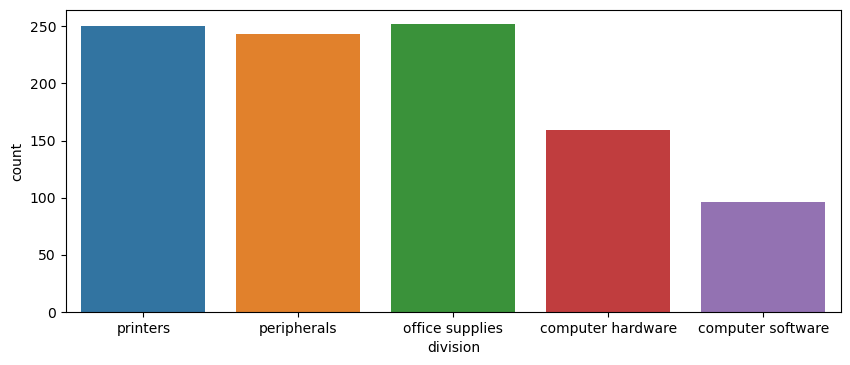

In [4]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data=dataset, x='division')

<AxesSubplot:xlabel='level of education', ylabel='count'>

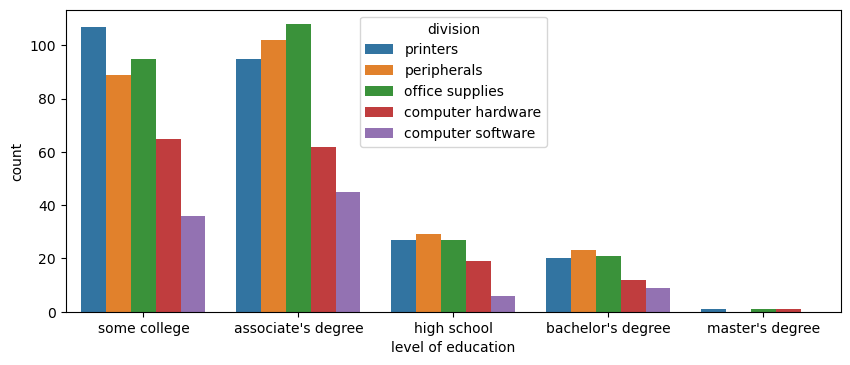

In [5]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data=dataset, x='level of education', hue='division')

<AxesSubplot:xlabel='level of education', ylabel='count'>

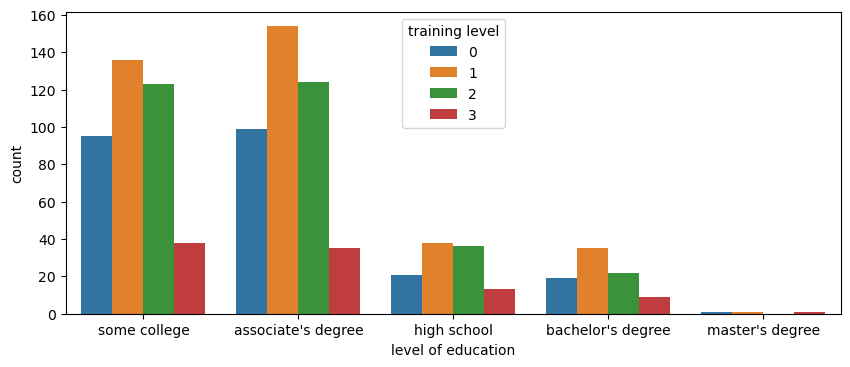

In [6]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='level of education', data=dataset, hue='training level')

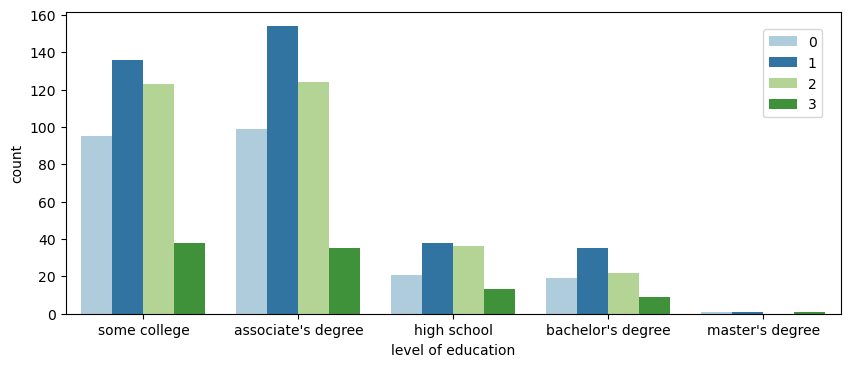

In [7]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='level of education', data=dataset, hue='training level', palette='Paired')
plt.legend(loc=(0.9,0.65))

### Bar Plot

<AxesSubplot:xlabel='level of education', ylabel='salary'>

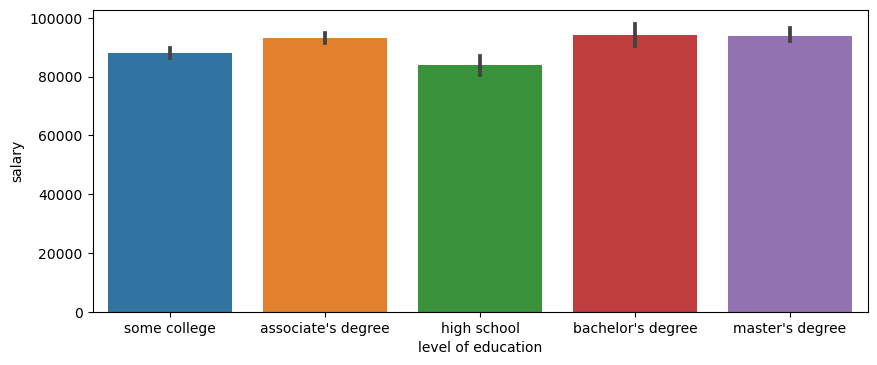

In [8]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(data=dataset, x='level of education', y='salary')
# CATEGORY vs CONTINOUS COLUMNN

<AxesSubplot:xlabel='level of education', ylabel='salary'>

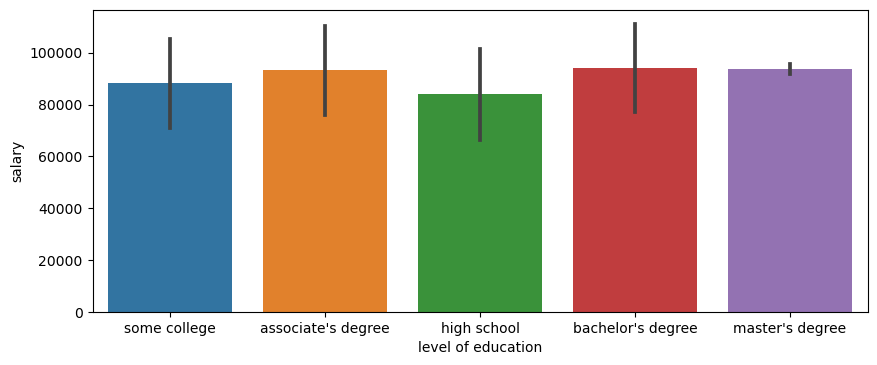

In [9]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(data=dataset, x='level of education', y='salary', estimator=np.mean, ci='sd')
# Mean salary per level of education
# CI = confidence interval
# sd = standard deviation
# small vertical line, smaller std

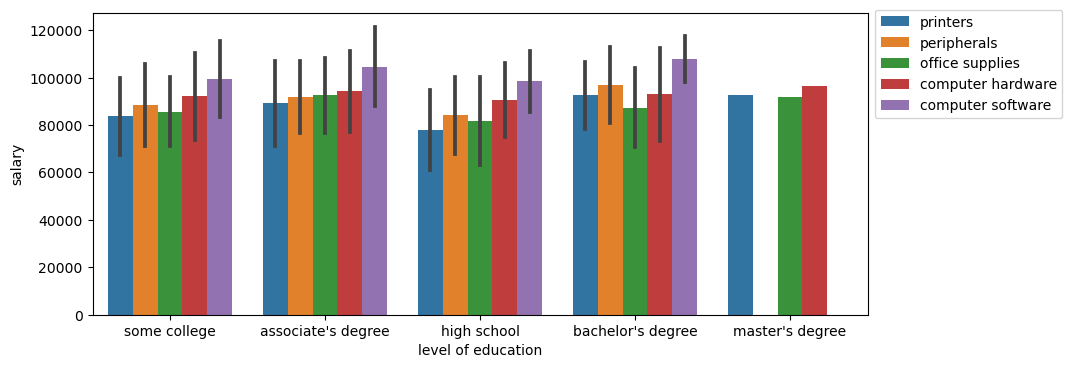

In [10]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(data=dataset, x='level of education', y='salary', estimator=np.mean, ci='sd', hue='division')
plt.legend(loc=(1.01,0.65))
#  bbox_to_anchor=(1,1)

## Distributions with Categories

* Boxplot
* Violinplot
* Swarmplot
* Boxenplot (Letter-Value Plot)

In [11]:
df = pd.read_csv('StudentsPerformance.csv')

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Box Plot

* displays distribution of a continous variable
* uses quartiles
    * seperates dataset into 4 equal number of data points
        * 25% bottom quartile
        * 50% median
        * Inter-quartile range (Q1 - Q3)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

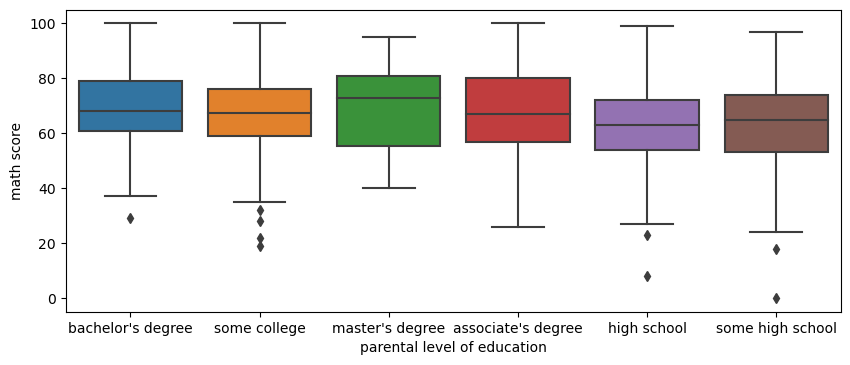

In [13]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(x='parental level of education', y='math score', data=df)

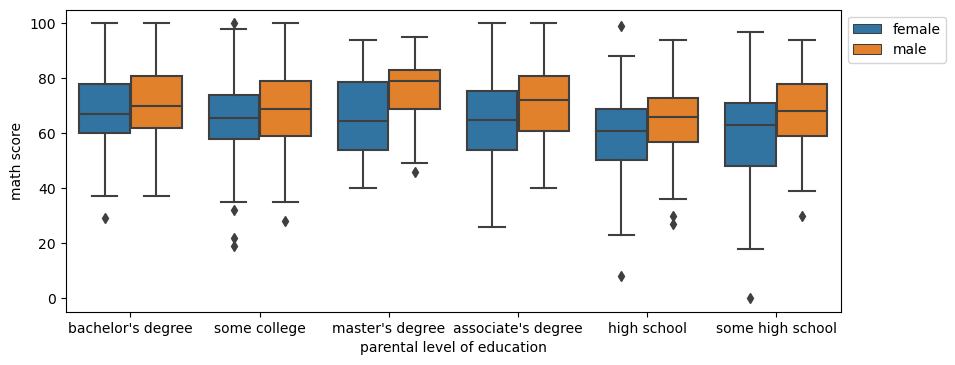

In [14]:
plt.figure(figsize=(10,4),dpi=100) 
sns.boxplot(data=df, x='parental level of education', y='math score', hue='gender')
plt.legend(bbox_to_anchor=(1, 1))

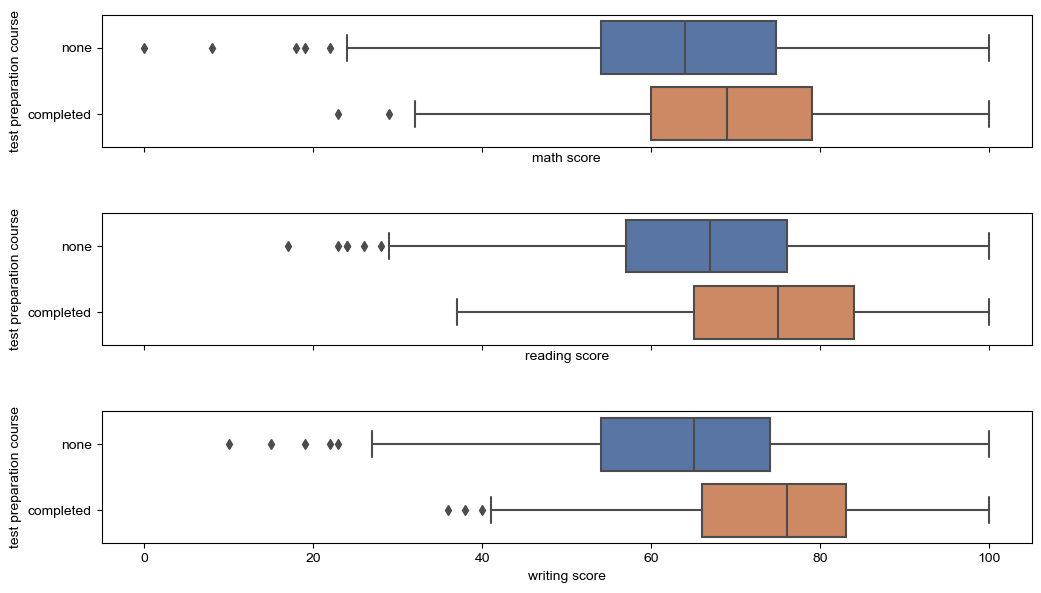

In [15]:
fig, axes = plt.subplots(3,1, figsize=(12,7), sharey=True, sharex=True, dpi=100)
list_score = ['math score', 'reading score', 'writing score']
sns.set(style='whitegrid')
for index,item in enumerate(list_score):
    sns.boxplot(x=item, y='test preparation course', data=df, ax=axes[index])
fig.subplots_adjust(wspace=0.5, hspace=0.5)

From the above graph, we can conclude that students who have completed the test preparation course are more likely to have higher scores

### Violin Plot

* similar as a boxplot
* displays the probability density across data using KDE
* mirrored KDE plot
* small white dot - median

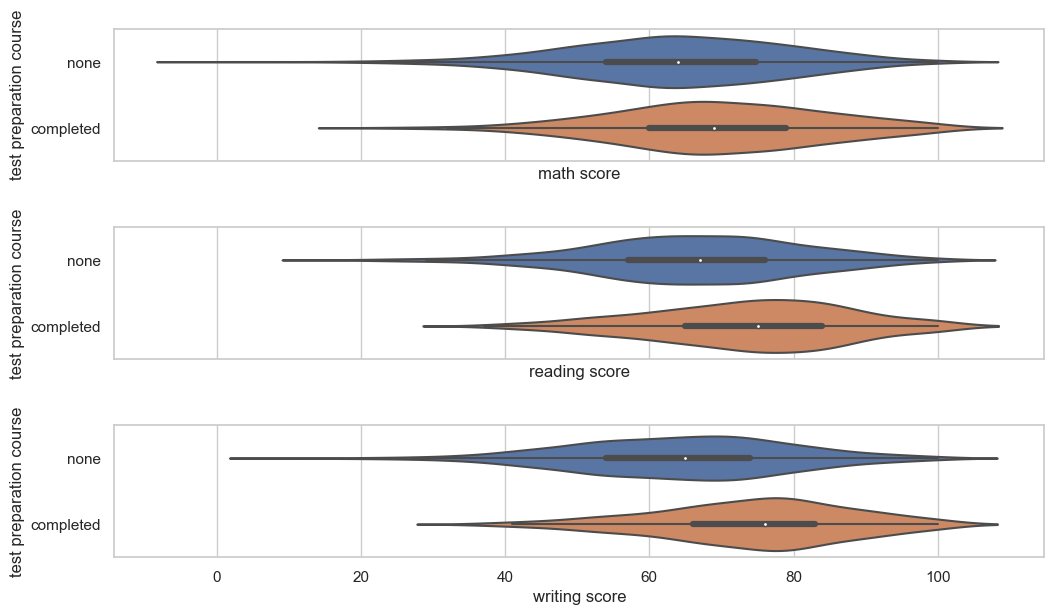

In [16]:
fig, axes = plt.subplots(3,1, figsize=(12,7), sharey=True, sharex=True, dpi=100)
list_score = ['math score', 'reading score', 'writing score']
sns.set(style='whitegrid')
for index,item in enumerate(list_score):
    sns.violinplot(x=item, y='test preparation course', data=df, ax=axes[index])
fig.subplots_adjust(wspace=0.5, hspace=0.5)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

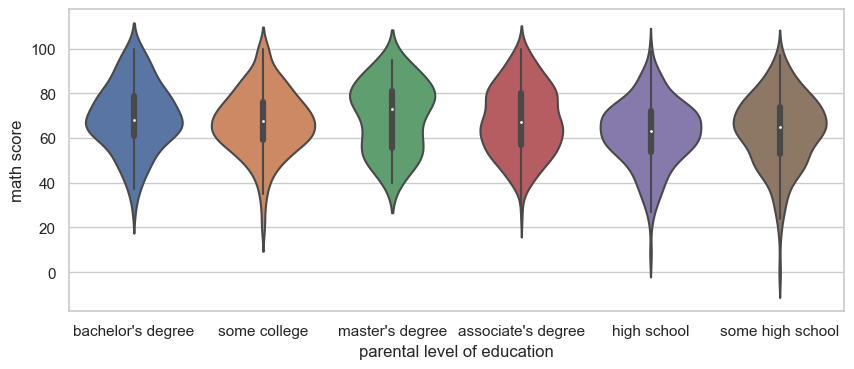

In [17]:
plt.figure(figsize=(10,4),dpi=100) 
sns.violinplot(data=df, x='parental level of education', y='math score')

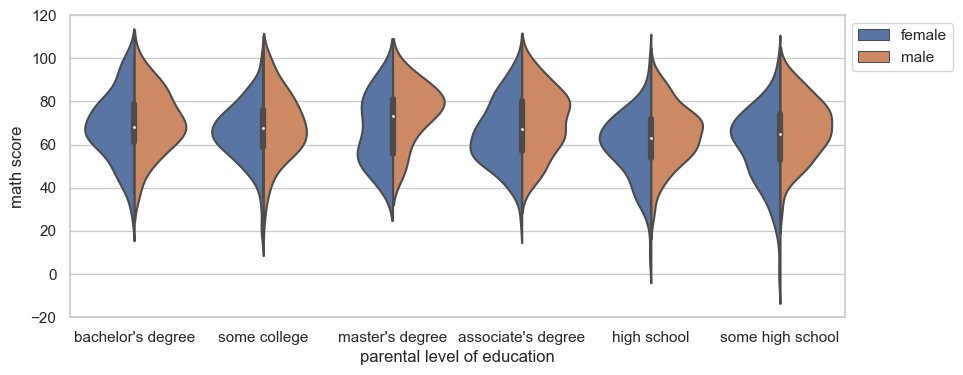

In [18]:
plt.figure(figsize=(10,4),dpi=100) 
sns.violinplot(data=df, x='parental level of education', y='math score', hue='gender', split=True)
# When using hue nesting with a variable that takes two levels, 
# setting split to True will draw half of a violin for each level. 
#This can make it easier to directly compare the distributions.
plt.legend(bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

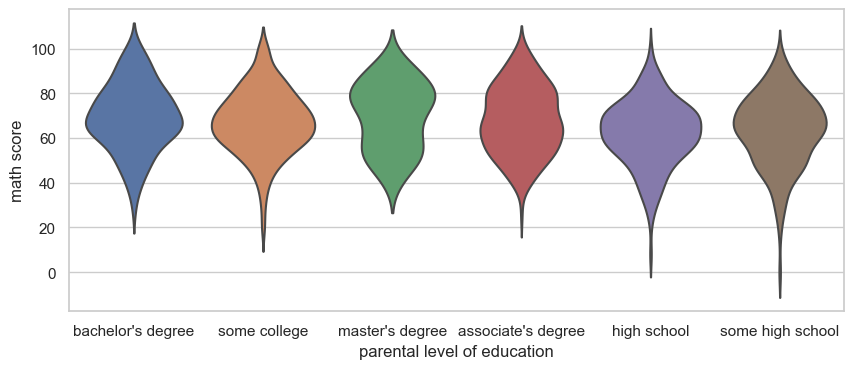

In [19]:
plt.figure(figsize=(10,4),dpi=100) 
sns.violinplot(data=df, x='parental level of education', y='math score', inner=None)
# inner : {"box", "quartile", "point", "stick", None}
# Representation of the datapoints in the violin interior.
# If box, draw a miniature boxplot.
# If quartiles, draw the quartiles of the distribution.
# If point or stick, show each underlying datapoint. 
# Using None will draw unadorned violins.

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

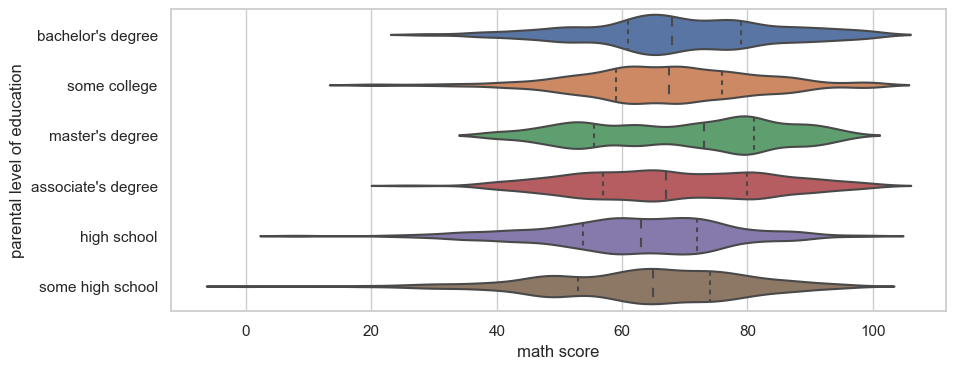

In [20]:
plt.figure(figsize=(10,4),dpi=100)
sns.violinplot(data=df, y='parental level of education', x='math score', inner='quartile', bw=0.2)
# Bandwidth or noise

### Swarm Plot

* shows all the data points in the distribution
* general distribution for very large dataset

<AxesSubplot:xlabel='math score'>

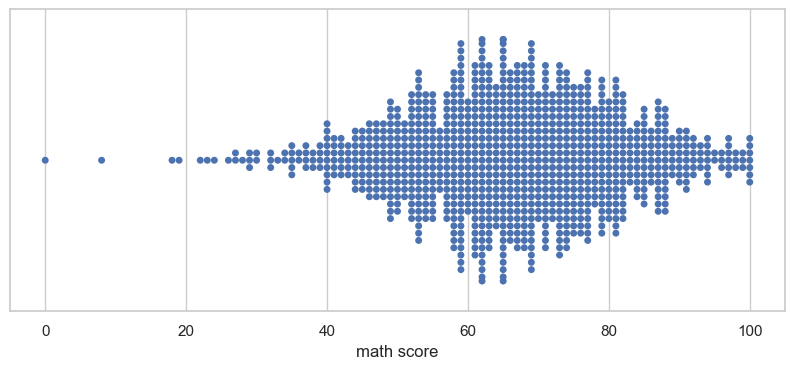

In [21]:
plt.figure(figsize=(10,4),dpi=100) 
sns.swarmplot(data=df, x='math score')

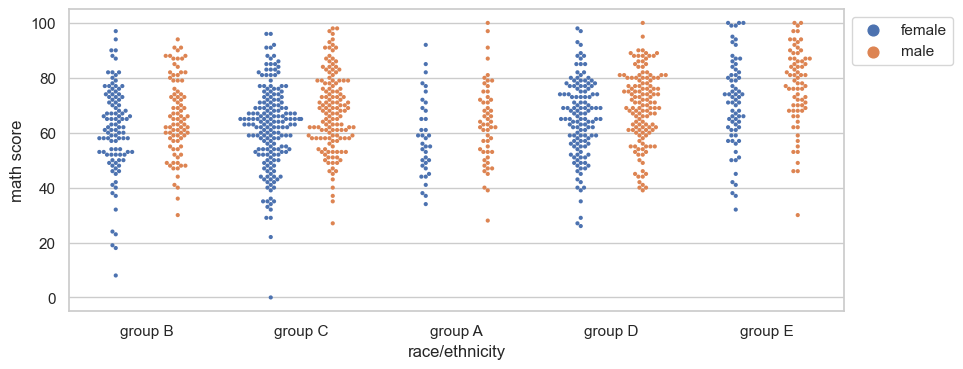

In [22]:
plt.figure(figsize=(10,4),dpi=100) 
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender',dodge=True, size=3)
plt.legend(bbox_to_anchor=(1,1))

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

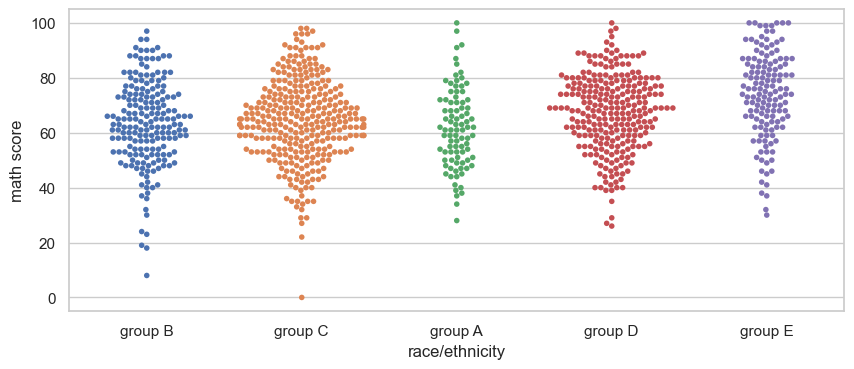

In [23]:
plt.figure(figsize=(10,4),dpi=100) 
sns.swarmplot(x='race/ethnicity',y='math score',data=df,size=4)

### Boxen Plot

* expansion upon normal box plot
* uses a system of letter-values: multiple quartiles instead of default
* avoid using, most people don't know about it

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

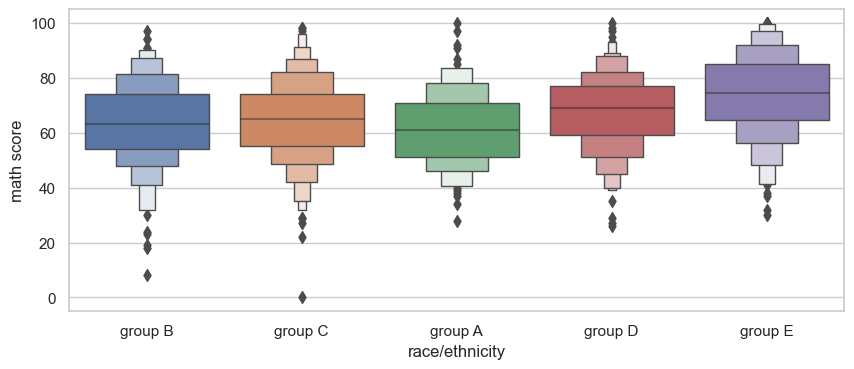

In [24]:
plt.figure(figsize=(10,4),dpi=100) 
sns.boxenplot(x='race/ethnicity',y='math score',data=df)

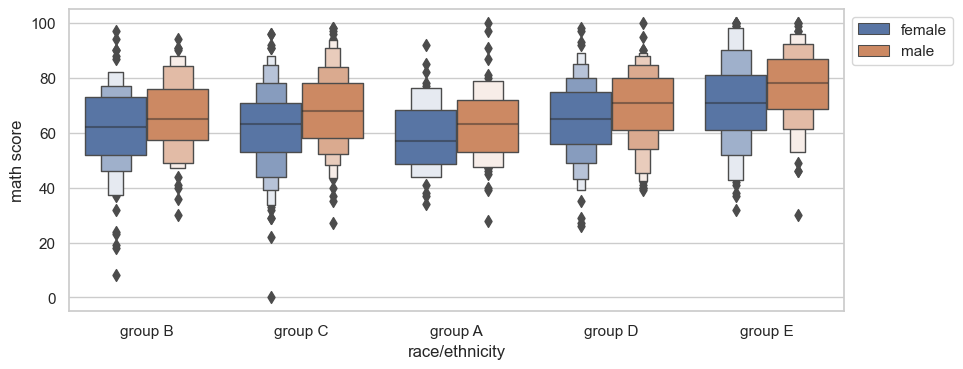

In [25]:
plt.figure(figsize=(10,4), dpi=100)
sns.boxenplot(x='race/ethnicity',y='math score',data=df,hue='gender')
plt.legend(bbox_to_anchor=(1, 1))